In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [57]:
#Variables
dataset=np.loadtxt('ge3_data_all_beta_nolabel.csv', delimiter=',')
x_raw=dataset[:,0:9]
y_raw=dataset[:,9]
y_raw=np.reshape(y_raw, (-1,1))
n_row = x_raw.shape[0]
n_col = x_raw.shape[1]

In [64]:
x_raw.shape, y_raw.shape

((2478, 9), (2478, 1))

In [86]:
delay = 2
def dataset_narx(x_raw, y_raw, n_row, n_col, delay):
#     xs = np.zeros(n_row-delay, int(n_col*(delay+1)+delay))
#     ys = np.zeros(n_row-delay, 1)
    xs = []
    ys = []
    for i in range(n_col):
        for j in range(delay+1):
            dx = x_raw[j:n_row-delay+j, i]
            xs.append(dx)
#     yd = np.concatenate(y0, axis=1)
    for k in range(delay):
        dy = y_raw[k:n_row-delay+k,0]
        ys.append(dy)
#         ys.reshape(n_row-delay, delay)
#     x = np.concatenate(np.array(xs),np.array(ys))
#     y = y_raw[delay:]
    
    return np.array(xs), np.array(ys)

X,Y = dataset_narx(x_raw, y_raw, n_row, n_col, delay)



In [88]:
x = np.concatenate((X.T,Y.T),axis=1)
y = y_raw[delay:]

In [89]:
# x,y = dataset_narx(x_raw, y_raw, n_row, n_col, delay)
X.shape, Y.shape, x.shape, y.shape

((27, 2476), (2, 2476), (2476, 29), (2476, 1))

In [90]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [91]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [95]:
model = Sequential()
model.add(Dense(12, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                360       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [97]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,  verbose=1, validation_split=0.2)

Train on 1485 samples, validate on 372 samples
Epoch 1/100
1485/1485 [==============================] - 1s 463us/sample - loss: 0.0481 - mse: 0.0481 - mae: 0.2036 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1478
Epoch 2/100
1485/1485 [==============================] - 0s 67us/sample - loss: 0.0162 - mse: 0.0162 - mae: 0.1011 - val_loss: 0.0119 - val_mse: 0.0119 - val_mae: 0.0684
Epoch 3/100
1485/1485 [==============================] - 0s 76us/sample - loss: 0.0097 - mse: 0.0097 - mae: 0.0576 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0614
Epoch 4/100
1485/1485 [==============================] - 0s 52us/sample - loss: 0.0093 - mse: 0.0093 - mae: 0.0554 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0599
Epoch 5/100
1485/1485 [==============================] - 0s 95us/sample - loss: 0.0090 - mse: 0.0090 - mae: 0.0532 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0585
Epoch 6/100
1485/1485 [==============================] - 0s 54us/sample - loss: 0.0086 - mse: 0.0086 -

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


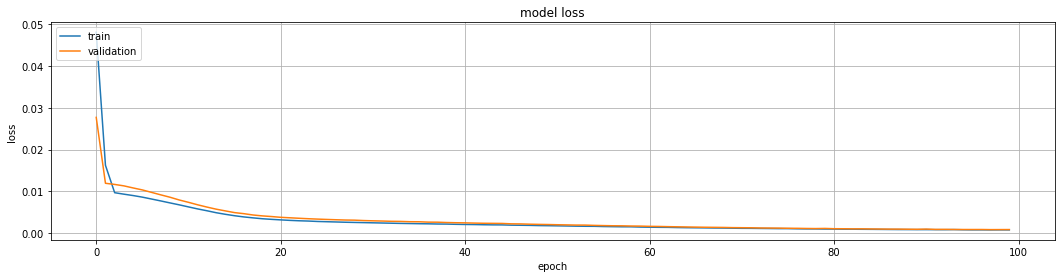

In [98]:
print(history.history.keys())
# "Loss"
plt.figure(figsize=(18,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [99]:
y_pred = model.predict(X_test)

In [100]:
# y_test_inv = inverse_transform(y_test.reshape(1, -1))
# y_pred_inv = inverse_transform(y_pred)
# scaler = MinMaxScaler()
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

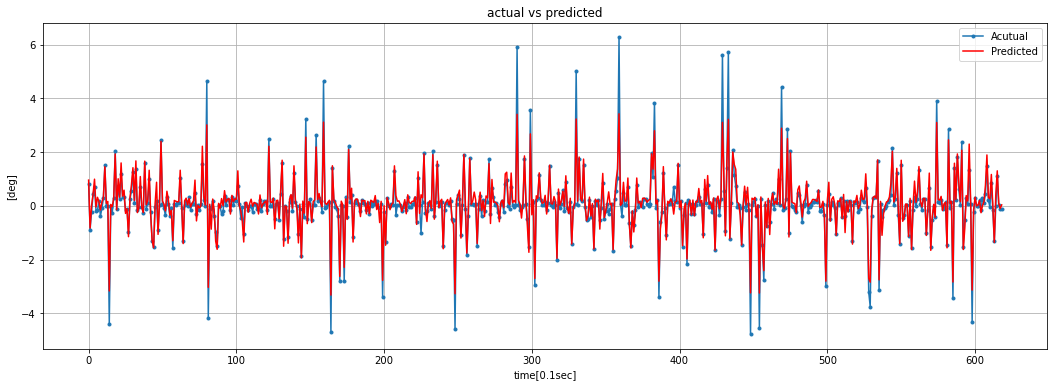

In [101]:
plt.figure(figsize=(18,6))
plt.plot(y_test_inv, marker='.', label="true")
plt.plot(y_pred_inv, 'r', label="prediction")

plt.title('actual vs predicted')
plt.ylabel('[deg]')
plt.xlabel('time[0.1sec]')
plt.grid()
plt.legend(['Acutual', 'Predicted'], loc='upper right')
plt.show()


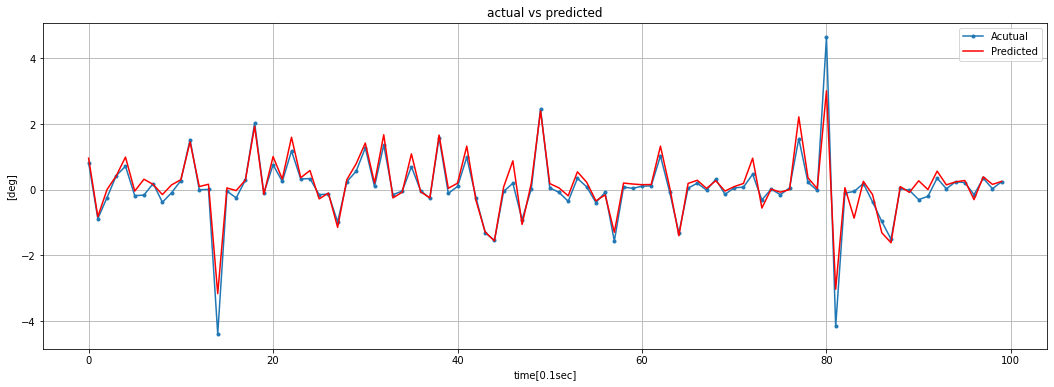

In [104]:
plt.figure(figsize=(18,6))
plt.plot(y_test_inv[0:100], marker='.', label="true")
plt.plot(y_pred_inv[0:100], 'r', label="prediction")

plt.title('actual vs predicted')
plt.ylabel('[deg]')
plt.xlabel('time[0.1sec]')
plt.grid()
plt.legend(['Acutual', 'Predicted'], loc='upper right')
plt.show()